## Phase 1: Business Understanding

### 1. Stakeholder Alignment
* **Stakeholders:** Medical Clinics / Healthcare Providers.
* **Business Goal:** Assist doctors in the early diagnosis of diabetes using physiological data.
* **Value Proposition:**
    * Reduce diagnostic time.
    * Minimize human error.
    * Identify high-risk patients early to prevent complications.

### 2. Key Performance Indicators (KPIs)
* **Primary Metric (Recall/Sensitivity):** The priority is minimizing False Negatives. It is critical not to miss a positive case (telling a diabetic patient they are healthy).
* **Secondary Metric (Precision):** Reducing False Positives to avoid unnecessary anxiety or further testing costs for healthy patients.
* **Business Metric:** Increase in the rate of early detection.

### 3. Problem Scoping
* **Problem Type:** Medical Diagnosis.
* **Available Data:** Historical patient records containing 8 physiological features (Glucose, BMI, Age, Insulin, etc.) and the diagnostic result.
* **Constraints:** The model relies solely on the provided structured tabular data (`diabetes.csv`).

### 4. Translating to Data Science Tasks
* **Task:** Binary Classification (Supervised Learning).
* **Target Variable:** `Outcome` (1 = Diabetic, 0 = Healthy).
* **Action:** Train a machine learning model to predict the probability of diabetes based on input health metrics.

## Phase 2: Data Understanding

### 2.1 Data Collection & Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### 2.2 Data Exploration - Statistics

df.info()

In [2]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [3]:
#هل عدد المصابين يساوي عدد غير المصابين؟
df['Outcome'].value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

### 2.3 Data Quality Assessment

In [4]:
#Check Duplicates 
df.duplicated().sum()

0

In [5]:
#Missing Values disguised as 0 القيم الصفريه
# الاعمدة دي مينفعش تكون صفر
cols_cannot_be_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [6]:
for col in cols_cannot_be_zero:
    zero_count = (df[col] == 0).sum()
    percentage = (zero_count / len(df)) * 100
    print(f"{col}: {zero_count} ({percentage:.2f}%)")

Glucose: 5 (0.65%)
BloodPressure: 35 (4.56%)
SkinThickness: 227 (29.56%)
Insulin: 374 (48.70%)
BMI: 11 (1.43%)


In [7]:
#أعلى العناصر ارتباطاً بمرض السكري
corr_matrix = df.corr(numeric_only=True)

# 2. الآن يمكنك تشغيل الكود الخاص بك
print(corr_matrix['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


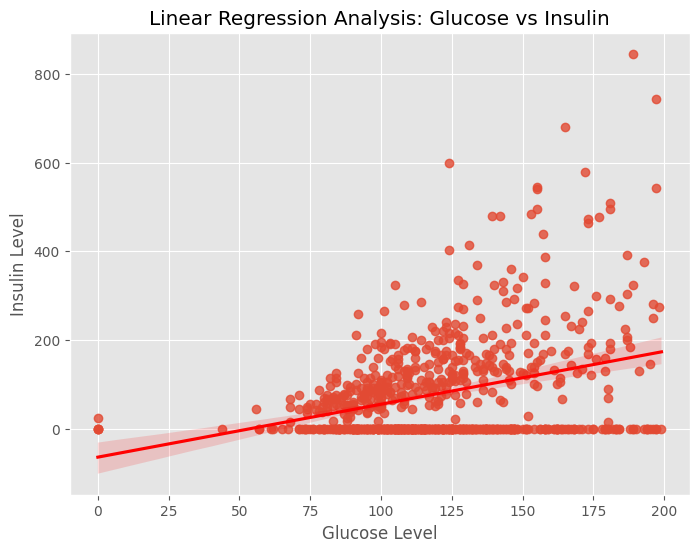


--- نتائج تحليل الانحدار الخطي (Glucose vs Insulin) ---
الميل (Slope): 1.1944
الجزء المقطوع (Intercept): -64.5925
معامل الارتباط (R-squared): 0.1098


In [8]:
# --- ب. Regression Analysis (تحليل الانحدار الإحصائي) ---
# ملاحظة: نحن هنا نستخدم الانحدار "للتحليل" (Analysis) وليس "للتوقع" (Prediction).
# سنرسم العلاقة بين 'Glucose' و 'Insulin' لنرى هل توجد علاقة خطية بينهما.
from scipy import stats

plt.figure(figsize=(8, 6))
# regplot يرسم النقاط (Scatter) ويرسم فوقها خط الانحدار (Regression Line)
sns.regplot(x='Glucose', y='Insulin', data=df, line_kws={'color': 'red'})
plt.title('Linear Regression Analysis: Glucose vs Insulin')
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')
plt.show()

# حساب الانحدار الخطي إحصائياً (Slope & Intercept)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Glucose'], df['Insulin'])
print("\n--- نتائج تحليل الانحدار الخطي (Glucose vs Insulin) ---")
print(f"الميل (Slope): {slope:.4f}")
print(f"الجزء المقطوع (Intercept): {intercept:.4f}")
print(f"معامل الارتباط (R-squared): {r_value**2:.4f}")

### 2.4 Visualization & Correlations

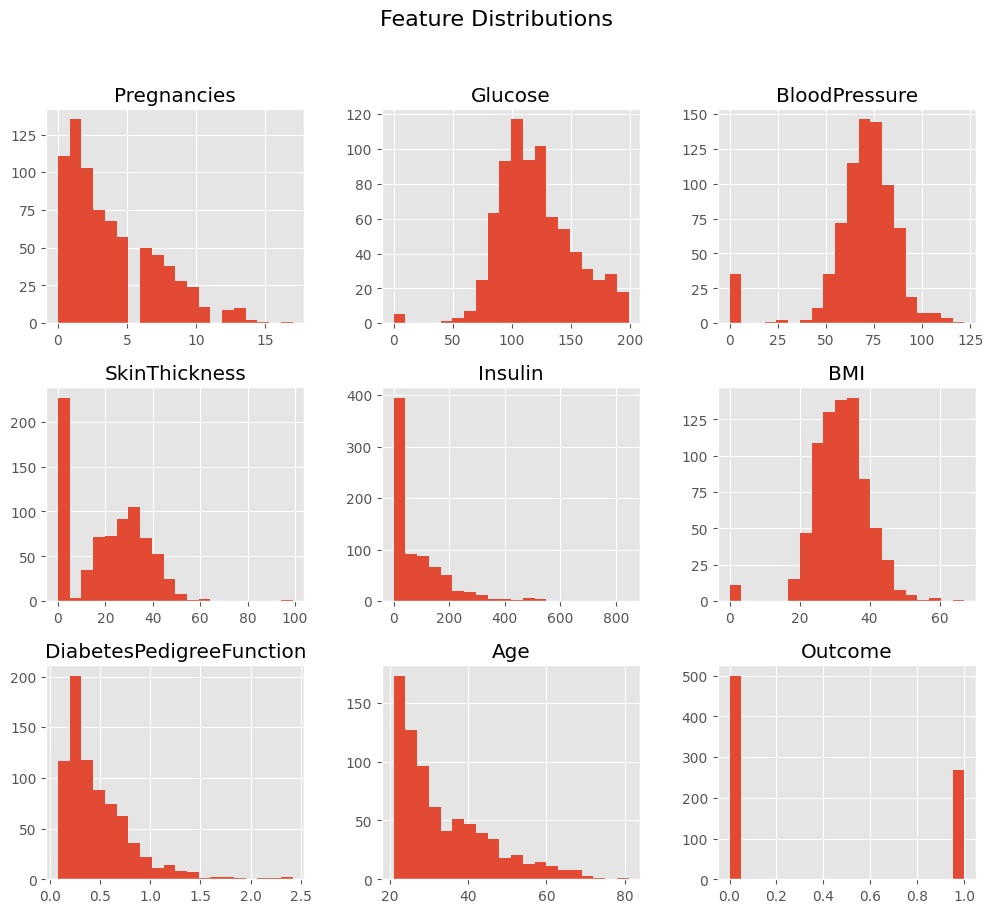

In [9]:
#Histograms
#توزيع البيانات لكل عمود
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

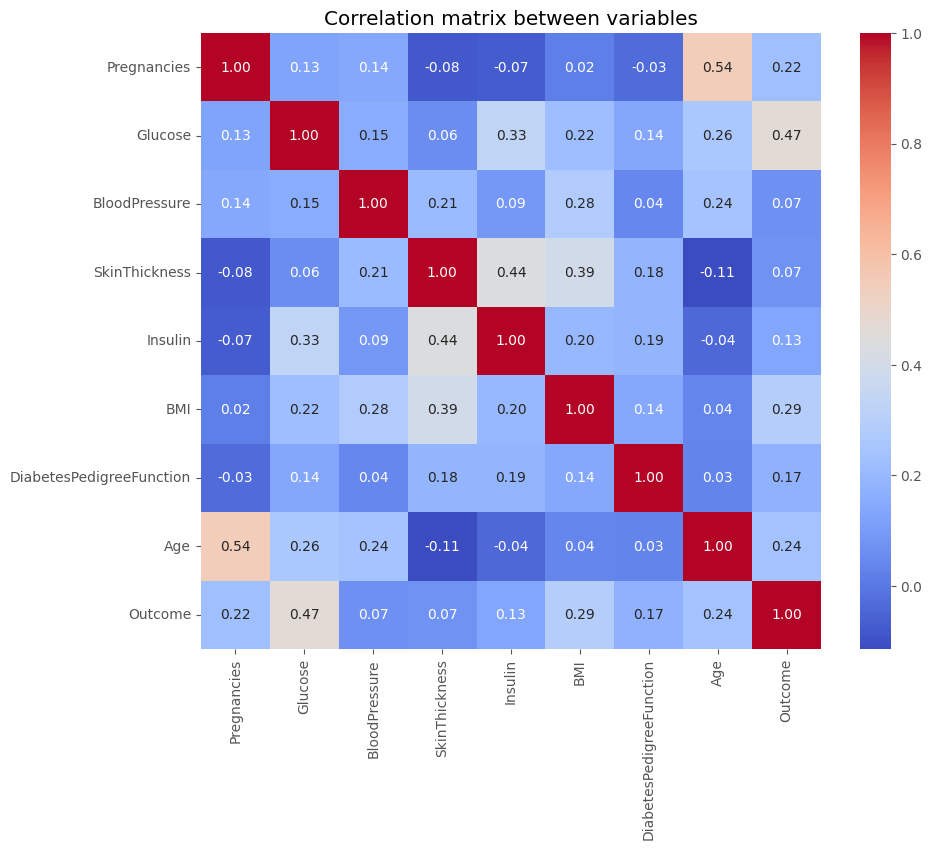

In [10]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix between variables")
plt.show()

## Phase 3: Data Preparation

### 3.1 Data Cleaning

In [11]:
import numpy as np
from sklearn.impute import SimpleImputer

In [12]:
df[cols_cannot_be_zero] = df[cols_cannot_be_zero].replace(0, np.nan)

In [13]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
# تعويض القيم المفقودة باستخدام الوسيط (Median)
# نستخدم SimpleImputer من مكتبة Scikit-Learn
imputer = SimpleImputer(strategy='median')
df[cols_cannot_be_zero] = imputer.fit_transform(df[cols_cannot_be_zero])

In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 3.2 Data Splitting

In [16]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)  
y = df['Outcome']               

# تقسيم البيانات: 80% تدريب - 20% اختبار
# random_state=42 لضمان ثبات النتائج عند إعادة التشغيل
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training shape: {X_train.shape}")
print(f"Testing shape: {X_test.shape}")

Training shape: (614, 8)
Testing shape: (154, 8)


### 3.3 Data Transformation - Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# نقوم بعمل Fit (حساب المتوسط والانحراف) على بيانات التدريب فقط!
# ثم نقوم بعمل Transform (تطبيق المعادلة) على التدريب والاختبار
# هذا يمنع ما يسمى Data Leakage (تسرب المعلومات)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Data after scaling
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
print("Data after scaling (first 5 rows):")
X_train_scaled_df.head()

Data after scaling (first 5 rows):


Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.526397 -1.256881      -0.018995       0.034298 -0.175620 -0.007450   
1     1.588046 -0.326051       0.808174      -0.560583 -0.175620 -0.599092   
2    -0.828460  0.571536      -2.169636      -1.155463 -0.652193 -0.526941   
3    -1.130523  1.302903      -1.838768       0.034298 -0.175620 -1.508200   
4     0.681856  0.405316       0.642740       0.986106  2.604392  1.998360   

   DiabetesPedigreeFunction       Age  
0                 -0.490735 -1.035940  
1                  2.415030  1.487101  
2                  0.549161 -0.948939  
3                 -0.639291  2.792122  
4                 -0.686829  1.139095

In [18]:
# Feature Selection using RandomForest importance
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

rf_for_fs = RandomForestClassifier(n_estimators=100, random_state=42)
selector = SelectFromModel(rf_for_fs, prefit=False, threshold='median')

selector.fit(X_train, y_train)
X_train_sel = selector.transform(X_train)
X_test_sel  = selector.transform(X_test)

# عرض الأعمدة المختارة
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print("Selected features:", list(selected_features))
print("Shapes -> X_train_sel:", X_train_sel.shape, ", X_test_sel:", X_test_sel.shape)

Selected features: ['Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Shapes -> X_train_sel: (614, 4) , X_test_sel: (154, 4)


## Phase 4: EDA

### 4.1 Statistical Summaries

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# تجميع البيانات حسب النتيجة (Outcome) وحساب المتوسط

print("--- متوسط القياسات للمصابين vs غير المصابين ---")
grouped_stats = df.groupby('Outcome').mean()
grouped_stats

--- متوسط القياسات للمصابين vs غير المصابين ---


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.682000      70.920000      27.726000  127.792000   
1           4.865672  142.130597      75.123134      31.686567  164.701493   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.885600                  0.429734  31.190000  
1        35.383582                  0.550500  37.067164

In [20]:
# نظرة أعمق: الانحراف المعياري (لمعرفة تشتت البيانات في كل فئة)
df.groupby('Outcome').std()

Pregnancies    Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                     
0           3.017185  24.707201      11.929385       8.552966   74.447469   
1           3.741239  29.568839      11.951672       8.662994  100.932249   

              BMI  DiabetesPedigreeFunction        Age  
Outcome                                                 
0        6.504128                  0.299085  11.667655  
1        6.595603                  0.372354  10.968254

### 4.2 Data Visualization

C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_14864\629966323.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=df, ax=axes[0], palette='Set2')
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_14864\629966323.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, ax=axes[1], palette='Set2')
C:\Users\moham.MSI-KATANA\AppData\Local\Temp\ipykernel_14864\629966323.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Age', data=df, ax=axes[2], palette='Set

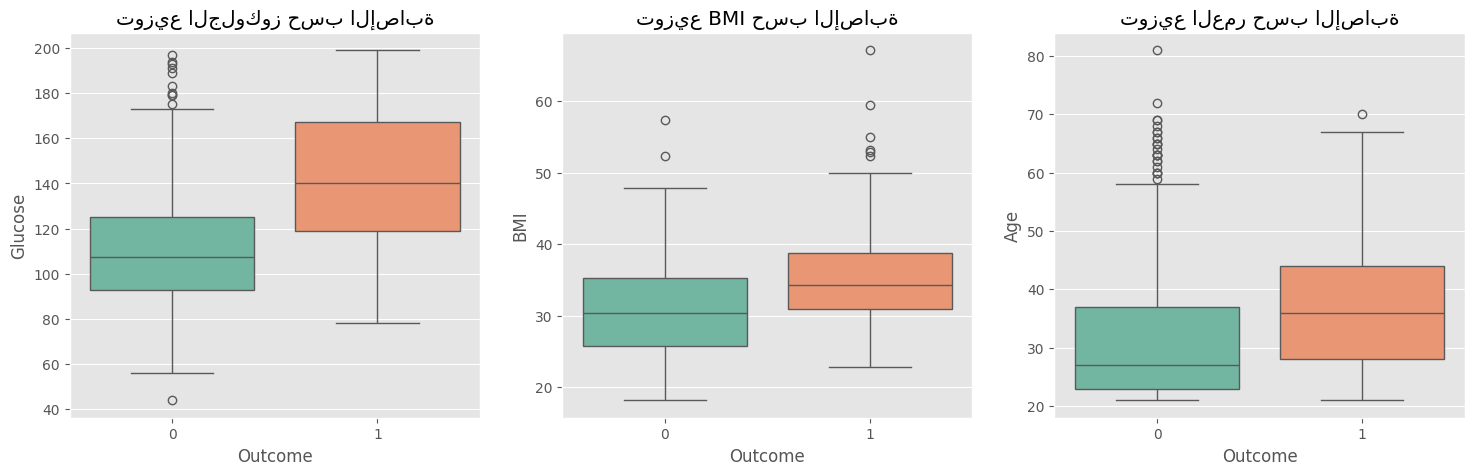

In [21]:
# إعداد الرسم: 3 رسوم بجانب بعضها
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. الجلوكوز
sns.boxplot(x='Outcome', y='Glucose', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('توزيع الجلوكوز حسب الإصابة')

# 2. مؤشر كتلة الجسم
sns.boxplot(x='Outcome', y='BMI', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('توزيع BMI حسب الإصابة')

# 3. العمر
sns.boxplot(x='Outcome', y='Age', data=df, ax=axes[2], palette='Set2')
axes[2].set_title('توزيع العمر حسب الإصابة')

plt.show()

### 4.3 Scatter Plots

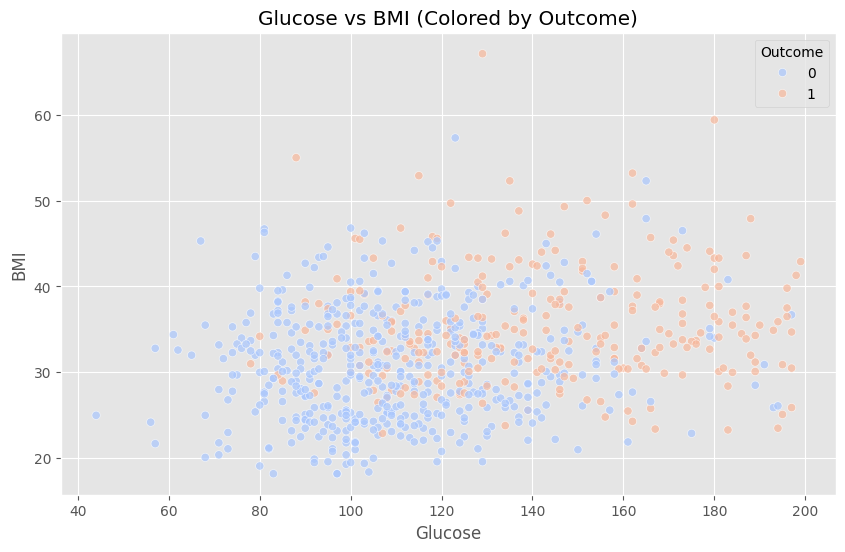

In [22]:
# رسم العلاقة بين الجلوكوز والوزن مع تلوين النقاط حسب الإصابة
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, alpha=0.7, palette='coolwarm')
plt.title('Glucose vs BMI (Colored by Outcome)')
plt.show()

### 4.4 Hypothesis Testing(T-test)

In [23]:
from scipy import stats

# Separate Glucose data for the two groups
glucose_diabetic = df[df['Outcome'] == 1]['Glucose']
glucose_healthy = df[df['Outcome'] == 0]['Glucose']

# Perform independent T-test
t_stat, p_value = stats.ttest_ind(glucose_diabetic, glucose_healthy)

print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.10f}") # Show many decimal places because the number will be very small

if p_value < 0.05:
    print("Result: Reject the Null Hypothesis. There is a statistically significant difference in Glucose levels between the two groups.")
else:
    print("Result: Fail to reject the Null Hypothesis. No sufficient evidence of a difference.")

T-Statistic: 15.67
P-Value: 0.0000000000
Result: Reject the Null Hypothesis. There is a statistically significant difference in Glucose levels between the two groups.


## Phase 5: Modeling & Evaluation

### 5.1 Logistic Regression:

### الانحدار اللوجستي **الفكرة:** نموذج خطي يستخدم للتصنيف. يقوم بحساب مجموع موزون للمدخلات (z = wx + b) ثم يمرر الناتج عبر دالة **سيجمويد** لتحويله إلى احتمال بين 0 و 1.
* **الرياضيات:** الدالة المستخدمة هي:


* **التدريب:** يحاول تقليل دالة الخطأ (**Log Loss**) باستخدام خوارزمية **Gradient Descent**.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Cross-validation to check stability of Logistic Regression
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [25]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
log_reg_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))

cv_scores = cross_val_score(log_reg_pipe, X_train, y_train, cv=cv, scoring='accuracy')
print(f"CV Accuracy: {cv_scores.mean():.3f} ± {cv_scores.std():.3f}")

CV Accuracy: 0.759 ± 0.025


In [26]:
# Logistic Regression hyperparameter tuning (C, penalty, solver)
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

lr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
])

param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'lr__penalty': ['l2'],
    'lr__solver': ['lbfgs']
}

grid_lr = GridSearchCV(lr_pipe, param_grid_lr, cv=cv, scoring='accuracy', n_jobs=-1)
grid_lr.fit(X_train, y_train)

print(f"Best CV Accuracy: {grid_lr.best_score_:.3f}")
print("Best params:", grid_lr.best_params_)

best_lr = grid_lr.best_estimator_
test_acc = best_lr.score(X_test, y_test)
print(f"Test Accuracy with tuned LR: {test_acc:.3f}")

Best CV Accuracy: 0.761
Best params: {'lr__C': 100, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Test Accuracy with tuned LR: 0.753


In [27]:
# استخدام أفضل نموذج Logistic Regression من GridSearchCV للتنبؤ على مجموعة الاختبار
y_pred_log = best_lr.predict(X_test)


In [28]:
# تقييم الدقة والتقرير التصنيفي للنموذج المضبوط
acc_log = accuracy_score(y_test, y_pred_log)
print(f"Tuned Logistic Regression Accuracy: {acc_log:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log))


Tuned Logistic Regression Accuracy: 0.753

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



In [29]:
y_proba_log = best_lr.predict_proba(X_test)[:, 1]

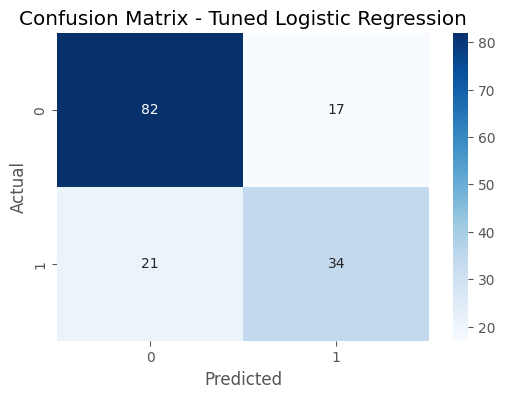

In [30]:
# مصفوفة الالتباس للنموذج المضبوط
conf_mat_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat_log, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 5.2 Decision Tree


### الفكرة:** نموذج يشبه المخطط الانسيابي. يقوم بتقسيم البيانات بناءً على أسئلة (مثل: هل نسبة الجلوكوز > 120؟).
* **الرياضيات:** يعتمد التقسيم على مقاييس مثل "شوائب جيني" أو "الإنتروبيا" لزيادة "نقاء" العقد.
* **التدريب:** عملية تكرارية لاختيار أفضل ميزة تقسم البيانات في كل خطوة.

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [32]:
# max_depth=5: نحدد عمق الشجرة لمنعها من حفظ البيانات (Overfitting)
dt_model = DecisionTreeClassifier(
    max_depth=9,
    min_samples_split=10,
    min_samples_leaf=4,
    criterion='gini',
    random_state=42
)

In [33]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [34]:
y_pred_dt = dt_model.predict(X_test_scaled)

In [35]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.74

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



In [36]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(40, 15), dpi=500)

tree.plot_tree(dt_model,
               feature_names=X.columns,
               class_names=['Healthy', 'Diabetic'], # تسمية الفئات
               filled=True,      
               rounded=True,     
               fontsize=11,      
               precision=2)      

plt.title("Decision Tree Visualization", fontsize=20)
plt.show() 

### 5.3 Random Forest


### الغابة العشوائية* **الفكرة:** هي تقنية تجميع. تقوم ببناء مئات أشجار القرار (كل شجرة تدرب على جزء عشوائي من البيانات)، ثم تأخذ التصويت بالأغلبية.
* **الحدس:** "حكمة الجمهور"؛ شجرة واحدة قد تخطئ، لكن 100 شجرة ستعطي نتيجة أدق وتقلل من مشكلة التجهيز الزائد.

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300, #يقلل variance
    max_depth=7,
    min_samples_leaf=2, # دا بيقلل الاوفر فيتتنج
    max_features='sqrt', #يمنع الأشجار تتشابه
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)


rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        99
           1       0.61      0.78      0.69        55

    accuracy                           0.75       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154



## Implementation from Scratch(Logistic Regression)

In [38]:
import numpy as np

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.1, num_iterations=2000, l2_lambda=0.01, patience=20, tol=1e-4):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.l2_lambda = l2_lambda  # L2 regularization strength
        self.patience = patience    # early stopping patience
        self.tol = tol              # minimum loss improvement
        self.weights = None
        self.bias = None
        
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def _loss(self, y, y_pred):
        n = len(y)
        eps = 1e-12
        log_loss = -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))
        l2_term = (self.l2_lambda / (2 * n)) * np.sum(self.weights ** 2)
        return log_loss + l2_term
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        best_loss = np.inf
        wait = 0

        for _ in range(self.num_iterations):
            linear_pred = np.dot(X, self.weights) + self.bias
            y_pred = self._sigmoid(linear_pred)

            # gradients with L2 penalty on weights
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + (self.l2_lambda / n_samples) * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # early stopping on loss
            loss = self._loss(y, y_pred)
            if best_loss - loss > self.tol:
                best_loss = loss
                wait = 0
            else:
                wait += 1
                if wait >= self.patience:
                    break

    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self._sigmoid(linear_pred)
        class_preds = (y_pred > 0.5).astype(int)
        return class_preds


X_train_np = X_train_scaled
X_test_np = X_test_scaled
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

custom_model = CustomLogisticRegression(learning_rate=0.1, num_iterations=2000, l2_lambda=0.01, patience=20)
custom_model.fit(X_train_np, y_train_np)

custom_preds = custom_model.predict(X_test_np)

accuracy = np.mean(custom_preds == y_test_np)
print(f"Custom Logistic Regression Accuracy: {accuracy:.2f}")

print(f"Sklearn Model Accuracy was: {acc_log:.2f}")

Custom Logistic Regression Accuracy: 0.75
Sklearn Model Accuracy was: 0.75


In [39]:
lrs = [0.01, 0.1, 0.5]
lambdas = [0.1, 0.01, 0.001]
patience = 20

best = {"acc": -1, "lr": None, "lam": None}

for lr in lrs:
    for lam in lambdas:
        model = CustomLogisticRegression(
            learning_rate=lr,
            num_iterations=3000,
            l2_lambda=lam, #Regularization
            patience=patience, #Early Stopping
            tol=1e-4,
        )
        model.fit(X_train_np, y_train_np)
        preds = model.predict(X_test_np)
        acc = np.mean(preds == y_test_np)
        print(f"lr={lr}, lambda={lam} -> acc={acc:.3f}")
        if acc > best["acc"]:
            best.update({"acc": acc, "lr": lr, "lam": lam})

print("\nأفضل نتيجة:")
print(f"accuracy={best['acc']:.3f} مع lr={best['lr']} و lambda={best['lam']}")

lr=0.01, lambda=0.1 -> acc=0.760
lr=0.01, lambda=0.01 -> acc=0.760
lr=0.01, lambda=0.001 -> acc=0.760
lr=0.1, lambda=0.1 -> acc=0.753
lr=0.1, lambda=0.01 -> acc=0.753
lr=0.1, lambda=0.001 -> acc=0.753
lr=0.5, lambda=0.1 -> acc=0.753
lr=0.5, lambda=0.01 -> acc=0.753
lr=0.5, lambda=0.001 -> acc=0.753

أفضل نتيجة:
accuracy=0.760 مع lr=0.01 و lambda=0.1
